# Aim

### To understand how demand varies with different features for a bike sharing company.

# Problem statement

### A bike-sharing company called BoomBikes has suffered a huge loss during COVID period and now they want to understand how different features influence the demand of bikes so that they can devise necessary buisnedd strategy to meet the demand levels and meet the customer's expectations of American market. The company wants to know
            1. Which variables are significant in predicting the demand for shared bikes
            2. How well those variables describe the bike demands

# Steps

     1. Data sourcing
     2. Data cleaning
        a. Null values
        b. Duplicate values
        c. Dropping unique identifier and insignificant columns
        d. Seggregating numerical and categorical variables
        e. Outlier treatment
     3. visualise data
     4. Prepare data for building a linear model
        a. Dealing with categorical variable
        b. Splitting into train and test data    
        c. Scaling
        d. Creating dummy variables
        
     5. Build Linear model by doing variable selection using RFE
        a. Find Variance Inflation Factor
        b. Find statistical information from linear model's summary
        c. Keep on eliminating variables until we reach p-value < 0.05 and VIF < 5
     6. Residual analysis and evaluation of assumptions
     7. Predictions and evaluations on test data
     8. Inference
  

## 1. Data sourcing

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [136]:
bike_df = pd.read_csv("day.csv")

In [137]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [138]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [139]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2.Data cleaning
        a. Null values

In [140]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [141]:
#The above info shows us that there are no non-null columns

    b. handling duplicate values

In [142]:
bike_df[bike_df.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [143]:
# Based on the above info, we can say that we have no duplicate records

    c. Dropping unique identifier and insignificant columns

In [144]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [145]:
bike_df.shape

(730, 16)

In [146]:
bike_df = bike_df.drop(['instant','dteday','casual','registered'], axis=1)

In [147]:
bike_df.shape

(730, 12)

In [148]:
# instant - its a unique identifying column, so dropping ut
#  dteday  - we already have yr, mnth fields to identify the date so we can drop 
 # casual and registered - we have these counts sum as another field cnt so we can drop

    d. Seggregating categorical and numerical variables

In [149]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [150]:
num_vars = ['temp','atemp','windspeed','cnt','hum']
cat_vars = ['season','mnth','weekday','weathersit']
binary_vars = ['holiday','workingday', 'yr']

    e. Outlier treatment

In [151]:
def draw_boxplot_num(cols):
    plt.figure(figsize=(20, 12))
    j=1
    for i in cols:
        plt.subplot(2,4,j)
        sns.boxplot(y= bike_df[i])
        j = j+1
    return 0

0

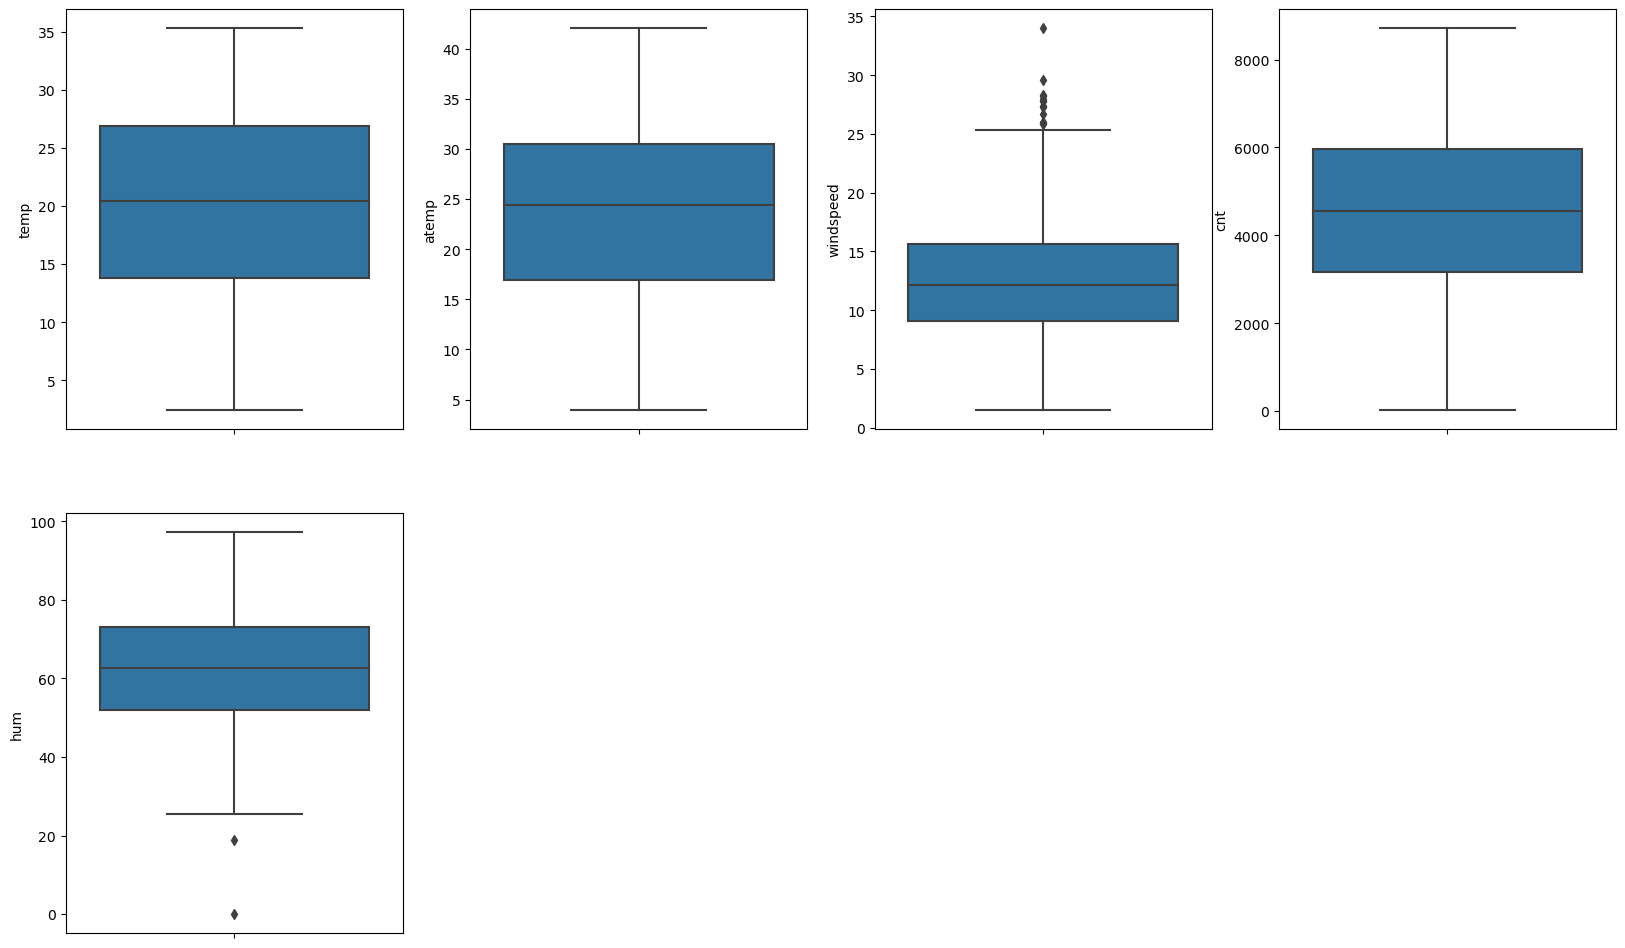

In [152]:
draw_boxplot_num(num_vars)

In [153]:
#We dont have outliers to treat here

In [154]:
def draw_boxplot_cat(cols):
    plt.figure(figsize=(20, 12))
    j=1
    for i in cols:
        plt.subplot(2,4,j)
        sns.boxplot(x= bike_df[i],y='cnt',data=bike_df)
        j = j+1
    return 0

0

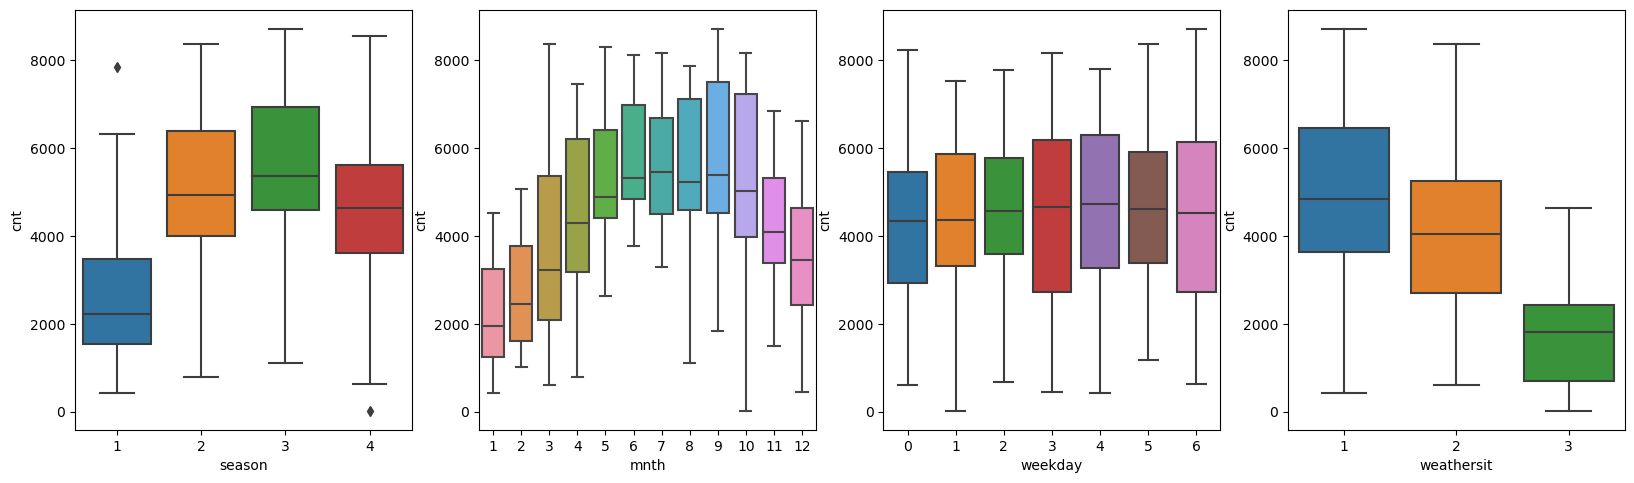

In [155]:
draw_boxplot_cat(cat_vars)

In [156]:
# there are no outliers in categorical variables as well

## 3. Visualise data

In [157]:
# Visualising categorical variables

In [158]:
categorical_variables = cat_vars + binary_vars

In [159]:
categorical_variables 

['season', 'mnth', 'weekday', 'weathersit', 'holiday', 'workingday', 'yr']

0

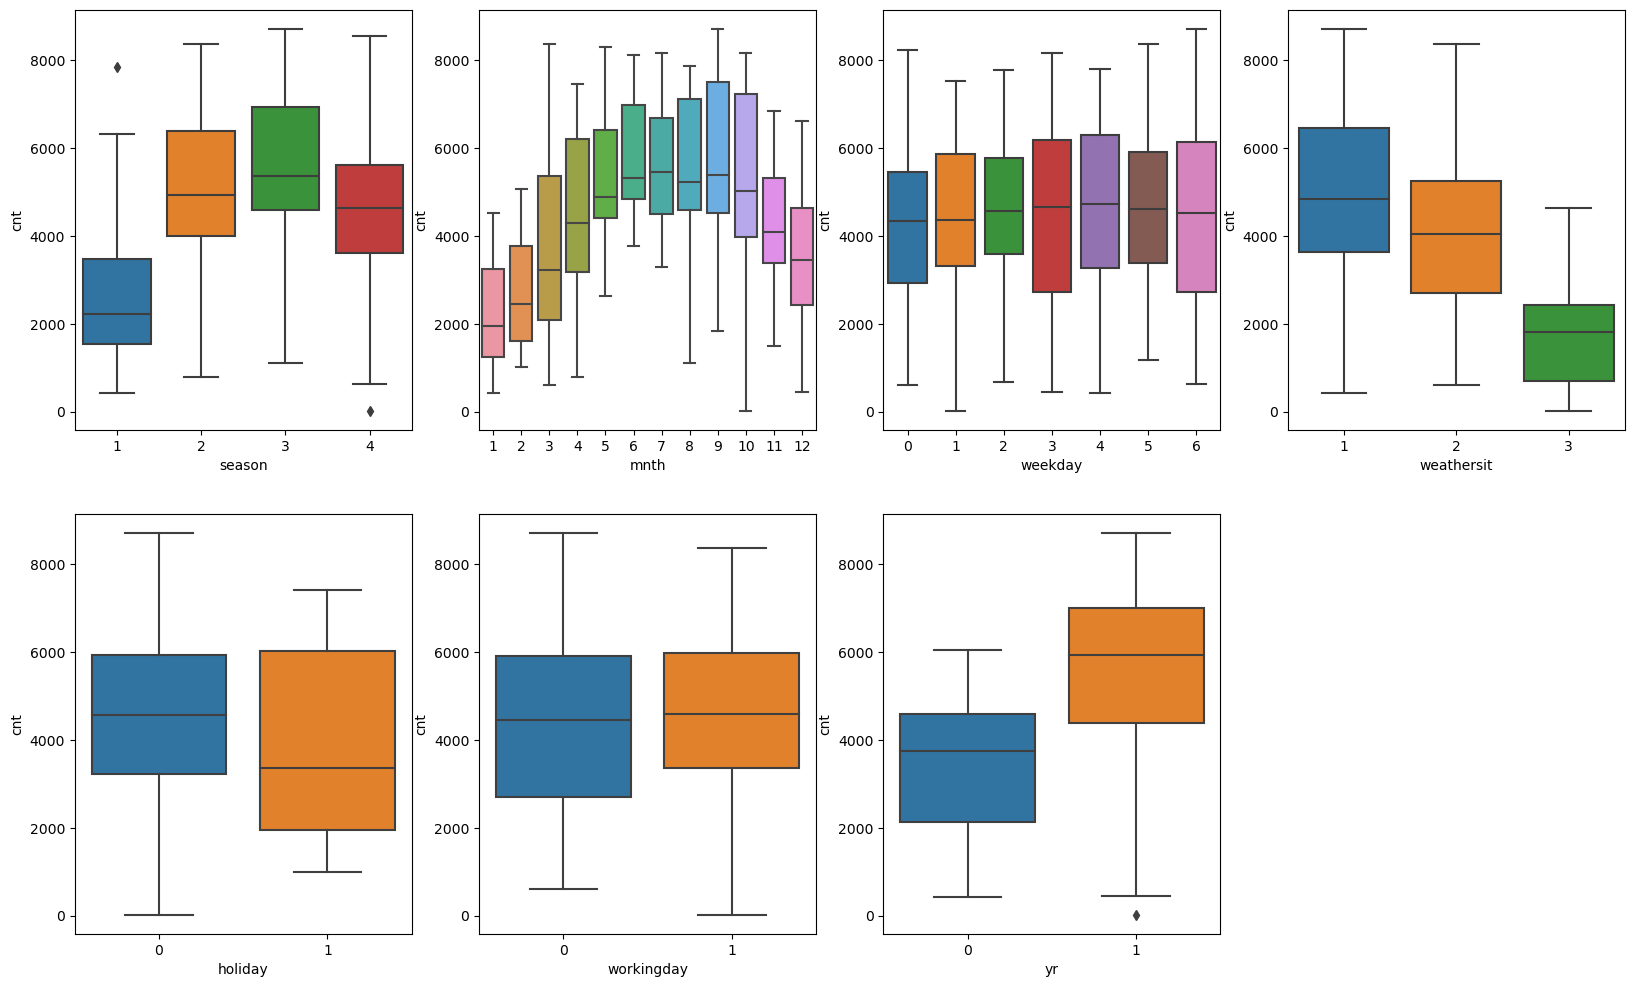

In [160]:
draw_boxplot_cat(categorical_variables)

###  Inference from catogorical variables:
        1.In fall season, there is a significant increase in bike hires 
        2.In september, october and november there is a significant increase in bike hires which also explains previous      point
        3.Bike hire is more in weekdays
        4.Clear weather attracts more bike hires
        5.Bike hire decreases on holiday
        6.In 2019, there are more hires which says that there is much more possibility of increase in next year

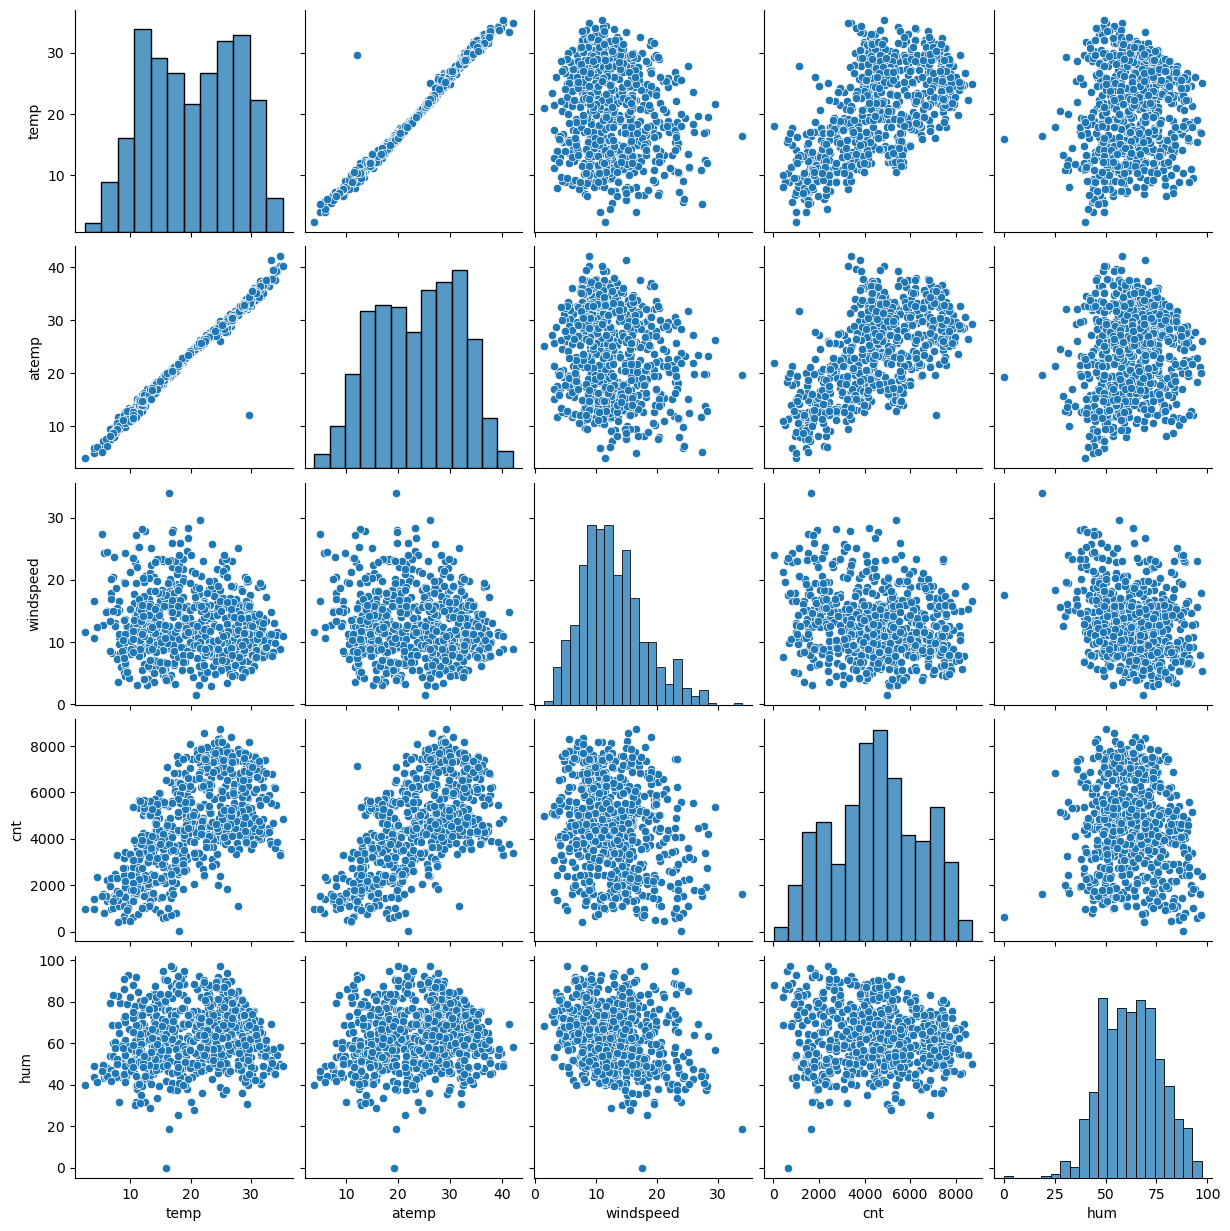

In [161]:
sns.pairplot(bike_df[num_vars])
plt.show()

In [162]:
# from pairplot we can clearly see a linear relationship between independent variables temp, atemp and a predictor variable cnt

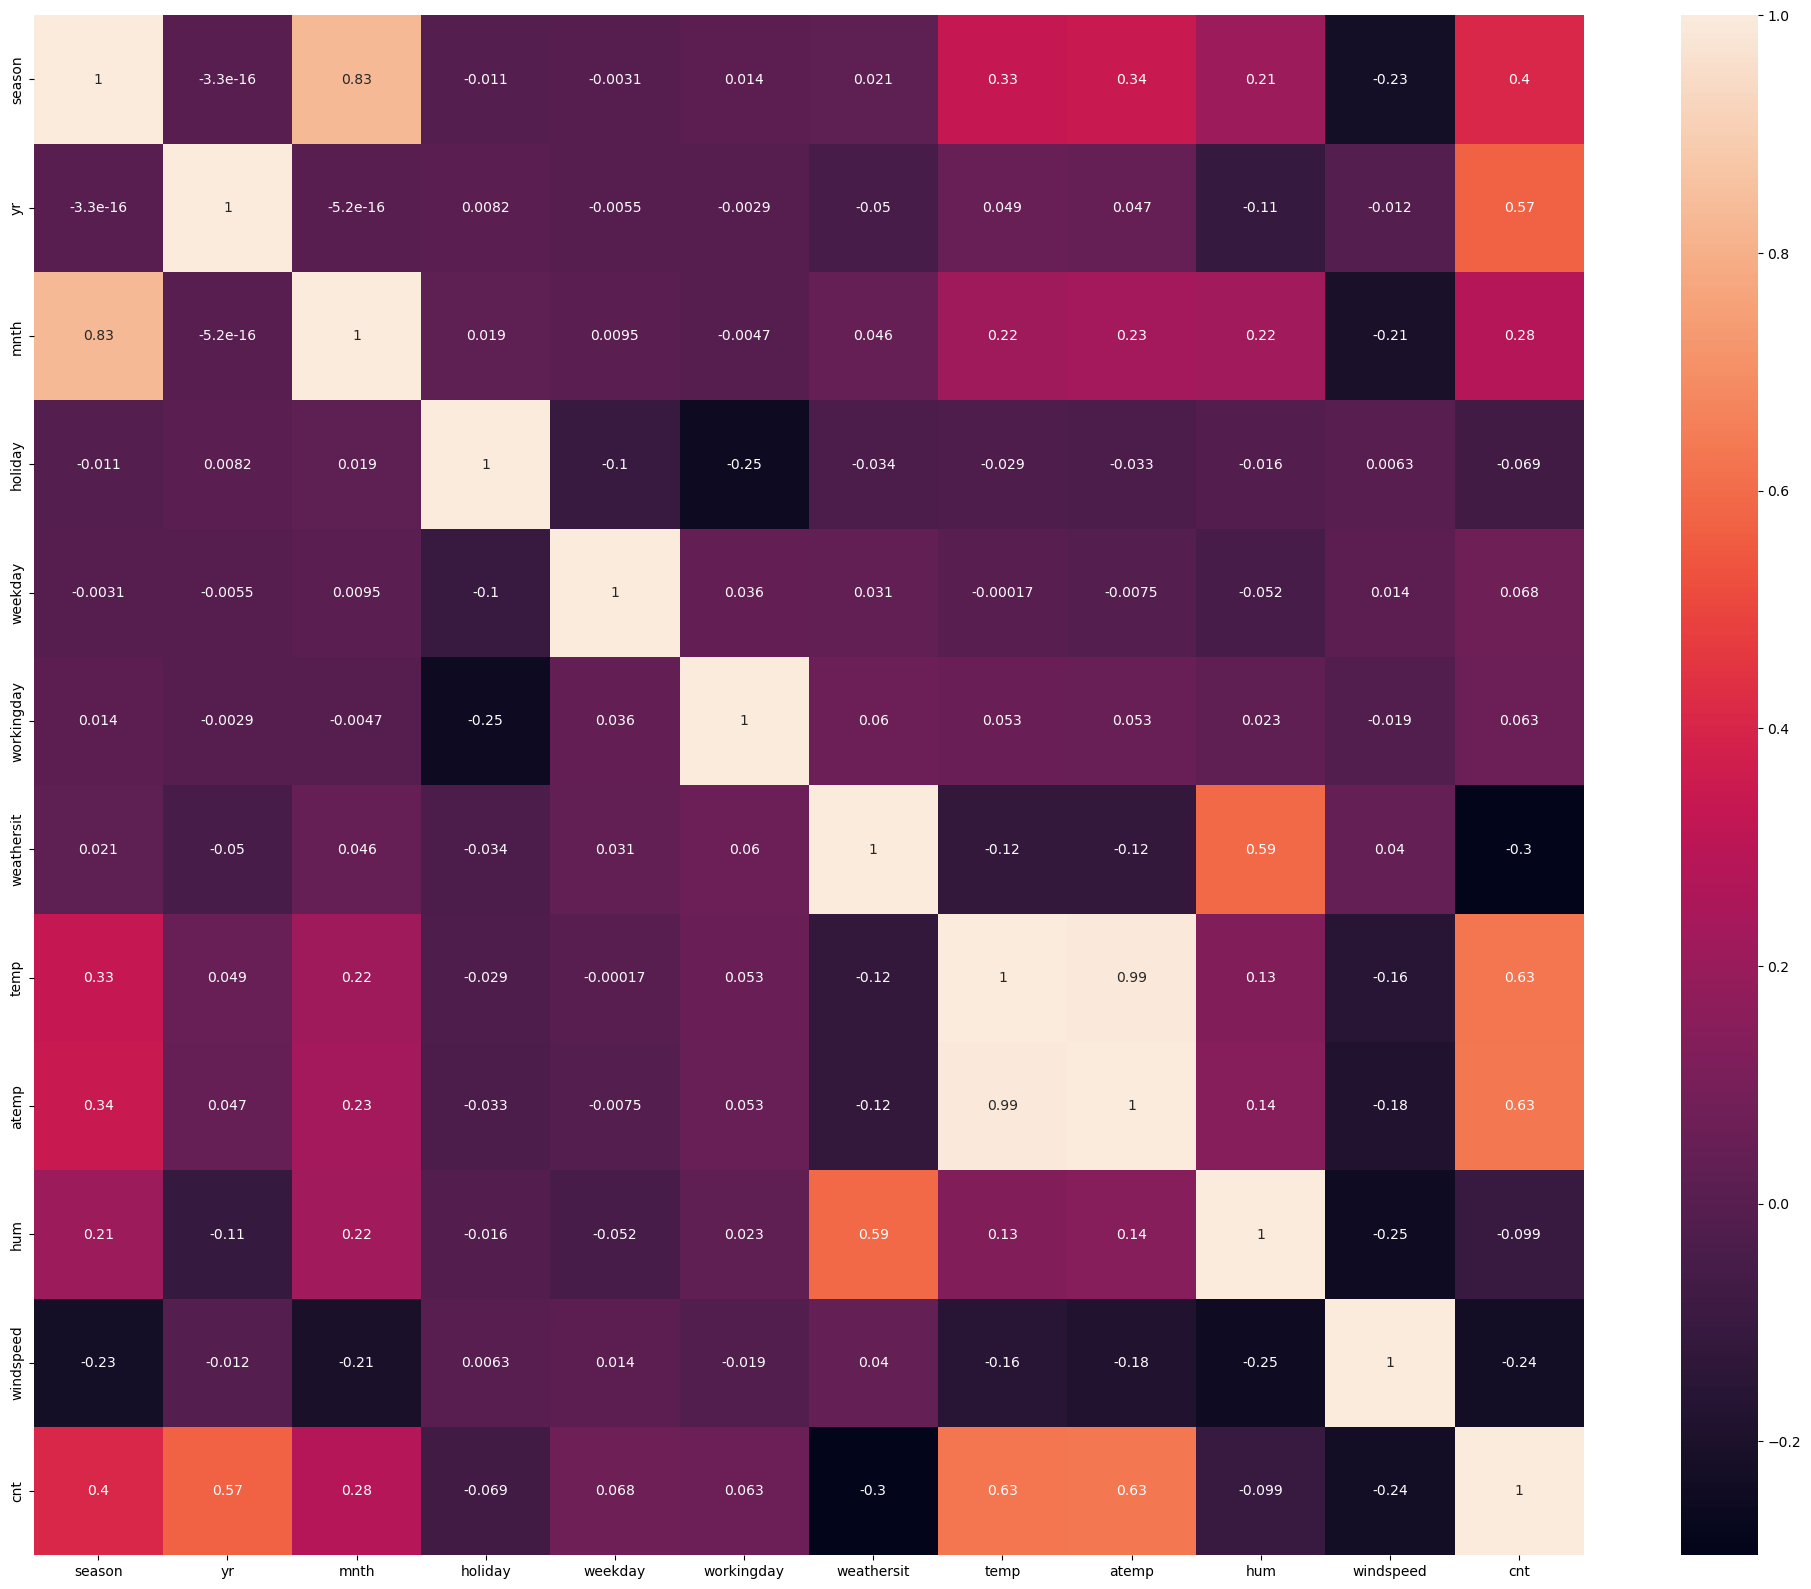

In [163]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_df.corr(), annot = True)
plt.show()

# 4. Prepare data for building a linear model
    a. Dealing with categorical variable

In [164]:
# converting categorical avriables to a type category to make scaling easier

In [165]:
#convert cat columns to type category
def convertToCat(cat_vars):
    for i in cat_vars:
        bike_df[i] = bike_df[i].astype('category')
    return 0

In [166]:
convertToCat(cat_vars)

0

In [167]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [168]:
# converted all categorical variables to type category

 b. Adding dummy variables

In [169]:
bike_df = pd.get_dummies(bike_df, drop_first=True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

### c. Splitting into test and train data

In [170]:
bike_train, bike_test = train_test_split(bike_df, train_size = 0.70, test_size = 0.30, random_state = 100)

In [171]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [172]:
bike_train.shape

(510, 30)

In [173]:
bike_test.shape

(219, 30)

In [174]:
# from shapes of bike_test and bike_train, we can confirm that 70 % of data is for training and 30% of data is for testing

### d.Scaling

In [175]:
#from sklearn.preprocessing, importing MinMaxScaler

In [176]:
scaler = MinMaxScaler()

In [177]:
num_vars

['temp', 'atemp', 'windspeed', 'cnt', 'hum']

In [178]:
#scaling the continuous variables

In [179]:
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [180]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
# now we can see that after scaling all the variables are in range 0 to 1

# Step 5:


5. Build Linear model by doing variable selection using RFE

In [182]:
#importing RFE from sklearn.feature_Selection
#importing LinearRegression from sklearn.Linear_model

In [183]:
#Create X and y
y_train = bike_train.pop('cnt')
X_train = bike_train

In [184]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [185]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [186]:
lm = LinearRegression()
lm.fit(bike_train, y_train)

#running RFE on lm
rfe = RFE(lm, step = 15)          
rfe = rfe.fit(X_train, y_train)

In [187]:
#getting the list of rfe support columns and their rankings

In [188]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 2),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('weekday_1', False, 2),
 ('weekday_2', False, 2),
 ('weekday_3', False, 2),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', False, 2),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [189]:
#only rfe supported columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [190]:
#columns which are not supported by rfe
X_train.columns[~rfe.support_]


Index(['holiday', 'workingday', 'atemp', 'season_3', 'mnth_2', 'mnth_6',
       'mnth_7', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [191]:
#creating a df which holds only the rfe supported columns data
X_train_rfe = X_train[col]

In [192]:
X_train_rfe.head()

,yr,temp,hum,windspeed,season_2,season_4,mnth_3,mnth_4,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
653,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,1,0,0
576,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0.442393,0.640189,0.255342,0,0,1,0,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,1,0


In [193]:
#when we read season_2, season_4, its not clear for understanding so we will give meaningful column names so that it will be helful
#for us in decision making

In [194]:
X_train_rfe.rename(columns = {'season_2':'summer'}, inplace = True) 
X_train_rfe.rename(columns = {'season_4':'winter'}, inplace = True) 
X_train_rfe.rename(columns = {'mnth_3':'march'}, inplace = True) 
X_train_rfe.rename(columns = {'mnth_4':'april'}, inplace = True) 
X_train_rfe.rename(columns = {'mnth_5':'may'}, inplace = True) 
X_train_rfe.rename(columns = {'mnth_8':'august'}, inplace = True) 
X_train_rfe.rename(columns = {'mnth_9':'september'}, inplace = True) 
X_train_rfe.rename(columns = {'mnth_10':'october'}, inplace = True) 
X_train_rfe.rename(columns = {'weathersit_2':'mist'}, inplace = True) 
X_train_rfe.rename(columns = {'weathersit_3':'light_snow'}, inplace = True) 


In [195]:
X_train_rfe.head()

,yr,temp,hum,windspeed,summer,winter,march,april,may,august,september,october,mist,light_snow
653,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,1,0,0
576,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0.442393,0.640189,0.255342,0,0,1,0,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,1,0


a. Find Variance Inflation Factor

In [196]:
#importing variance_inflation_factor from statsmodels.stats.outliers_influence

In [197]:
def find_vif(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [198]:
find_vif(X_train_rfe)

,Features,VIF
2,hum,14.82
1,temp,10.19
4,summer,4.12
3,windspeed,3.85
5,winter,2.36
8,may,2.27
7,april,2.25
12,mist,2.13
0,yr,2.03
9,august,1.62


b. Find statistical information from linear model's summary

## Model 1

In [199]:
X_train_rfe = sm.add_constant(X_train_rfe)
model_1 = sm.OLS(y_train, X_train_rfe).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          4.30e-187
Time:                        00:28:32   Log-Likelihood:                 506.95
No. Observations:                 510   AIC:                            -983.9
Df Residuals:                     495   BIC:                            -920.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2310      0.028      8.311      0.000       0.176       0.286
yr             0.2288      0.008     27.985      0.000       0.213       0.245
temp           0.5414      0.023     23.518      0.000       0.496       0.587
hum           -0.1876      0.038     -4.913      0.000      -0.263      -0.113
windspeed     -0.1931      0.026     -7.421      0.000      -0.244      -0.142
summer         0.0878      0.017      5.321      0.000       0.055       0.120
winter         0.1402      0.012     11.232      0.000       0.116       0.165
march          0.0350      0.015      2.274      0.023       0.005       0.065
april          0.0207      0.022      0.957      0.339      -0.022       0.063
may            0.0365      0.021      1.743      0.082      -0.005       0.078
august         0.0642      0.017      3.872      0.000       0.032       0.097
september      0.1288      0.017      7.772      0.000       0.096       0.161
october        0.0400      0.018      2.285      0.023       0.006       0.074
mist          -0.0528      0.011     -4.997      0.000      -0.074      -0.032
light_snow    -0.2355      0.027     -8.851      0.000      -0.288      -0.183
==============================================================================
Omnibus:                       75.401   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.554
Skew:                          -0.760   Prob(JB):                     5.10e-41
Kurtosis:                       5.534   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
X_train_rfe.head()

,const,yr,temp,hum,windspeed,summer,winter,march,april,may,august,september,october,mist,light_snow
653,1.0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,1,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.640189,0.255342,0,0,1,0,0,0,0,0,1,0
728,1.0,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,1,0


### Steps to eliminate variable
    1. High p-value, high VIF - eleminate
        2. High p-value, low VIF - eliminate first
        3. Low p-value, High vif - eleminate next
    4. Low p-value, Low Vif - dont eleminate

In [201]:
# from vif and p-values, we can see that april has highes p-value, so it has least significance, so removing it

In [202]:
X_train_rfe = X_train_rfe.drop(['april'], axis=1)

In [203]:
find_vif(X_train_rfe)

,Features,VIF
0,const,47.42
3,hum,1.91
6,winter,1.79
5,summer,1.74
2,temp,1.63
12,mist,1.55
8,may,1.51
11,october,1.49
9,august,1.47
10,september,1.25


## Model 2


In [204]:
model_2 = sm.OLS(y_train, X_train_rfe).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          4.69e-188
Time:                        00:28:34   Log-Likelihood:                 506.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     496   BIC:                            -925.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2330      0.028      8.406      0.000       0.179       0.287
yr             0.2293      0.008     28.078      0.000       0.213       0.245
temp           0.5381      0.023     23.640      0.000       0.493       0.583
hum           -0.1888      0.038     -4.947      0.000      -0.264      -0.114
windspeed     -0.1905      0.026     -7.362      0.000      -0.241      -0.140
summer         0.0983      0.012      7.961      0.000       0.074       0.123
winter         0.1394      0.012     11.193      0.000       0.115       0.164
march          0.0300      0.014      2.074      0.039       0.002       0.058
may            0.0260      0.018      1.459      0.145      -0.009       0.061
august         0.0647      0.017      3.906      0.000       0.032       0.097
september      0.1293      0.017      7.803      0.000       0.097       0.162
october        0.0404      0.018      2.309      0.021       0.006       0.075
mist          -0.0528      0.011     -4.993      0.000      -0.074      -0.032
light_snow    -0.2352      0.027     -8.839      0.000      -0.287      -0.183
==============================================================================
Omnibus:                       76.069   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.154
Skew:                          -0.764   Prob(JB):                     1.39e-41
Kurtosis:                       5.553   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
#we can see that may has significance more that 0.05 so we can eleminate may

In [206]:
X_train_rfe = X_train_rfe.drop(['may'], axis=1)

In [207]:
find_vif(X_train_rfe)

,Features,VIF
0,const,46.76
3,hum,1.87
6,winter,1.79
2,temp,1.62
11,mist,1.55
10,october,1.49
8,august,1.46
5,summer,1.38
9,september,1.24
12,light_snow,1.24


## Model 3

In [208]:
model_3 = sm.OLS(y_train, X_train_rfe).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          8.96e-189
Time:                        00:28:36   Log-Likelihood:                 505.39
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     497   BIC:                            -929.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2282      0.028      8.283      0.000       0.174       0.282
yr             0.2289      0.008     28.013      0.000       0.213       0.245
temp           0.5404      0.023     23.773      0.000       0.496       0.585
hum           -0.1805      0.038     -4.778      0.000      -0.255      -0.106
windspeed     -0.1918      0.026     -7.406      0.000      -0.243      -0.141
summer         0.1065      0.011      9.690      0.000       0.085       0.128
winter         0.1385      0.012     11.125      0.000       0.114       0.163
march          0.0268      0.014      1.868      0.062      -0.001       0.055
august         0.0627      0.017      3.792      0.000       0.030       0.095
september      0.1273      0.017      7.702      0.000       0.095       0.160
october        0.0397      0.018      2.268      0.024       0.005       0.074
mist          -0.0530      0.011     -5.015      0.000      -0.074      -0.032
light_snow    -0.2378      0.027     -8.946      0.000      -0.290      -0.186
==============================================================================
Omnibus:                       75.018   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.300
Skew:                          -0.768   Prob(JB):                     1.92e-39
Kurtosis:                       5.456   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
#march has p-value greater than 0.05, so we can eleminate it

In [210]:
X_train_rfe = X_train_rfe.drop(['march'], axis=1)

In [211]:
find_vif(X_train_rfe)

,Features,VIF
0,const,45.81
3,hum,1.87
6,winter,1.72
2,temp,1.59
10,mist,1.55
9,october,1.49
7,august,1.45
5,summer,1.38
8,september,1.24
11,light_snow,1.24


## Model 4

In [212]:
model_4 = sm.OLS(y_train, X_train_rfe).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          3.23e-189
Time:                        00:28:37   Log-Likelihood:                 503.60
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     498   BIC:                            -932.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.027      8.614      0.000       0.182       0.289
yr             0.2291      0.008     27.972      0.000       0.213       0.245
temp           0.5342      0.023     23.696      0.000       0.490       0.578
hum           -0.1820      0.038     -4.808      0.000      -0.256      -0.108
windspeed     -0.1890      0.026     -7.292      0.000      -0.240      -0.138
summer         0.1065      0.011      9.664      0.000       0.085       0.128
winter         0.1339      0.012     10.945      0.000       0.110       0.158
august         0.0605      0.017      3.659      0.000       0.028       0.093
september      0.1255      0.017      7.585      0.000       0.093       0.158
october        0.0401      0.018      2.286      0.023       0.006       0.075
mist          -0.0528      0.011     -4.983      0.000      -0.074      -0.032
light_snow    -0.2358      0.027     -8.856      0.000      -0.288      -0.183
==============================================================================
Omnibus:                       74.396   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.246
Skew:                          -0.743   Prob(JB):                     2.19e-41
Kurtosis:                       5.570   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
#october has higher p value, so eleminating it

In [214]:
X_train_rfe = X_train_rfe.drop(['october'], axis=1)

In [215]:
find_vif(X_train_rfe)

,Features,VIF
0,const,45.11
3,hum,1.86
9,mist,1.55
2,temp,1.54
7,august,1.44
5,summer,1.37
6,winter,1.32
10,light_snow,1.23
8,september,1.21
4,windspeed,1.18


## model 5

In [216]:
model_5 = sm.OLS(y_train, X_train_rfe).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          2.62e-189
Time:                        00:28:38   Log-Likelihood:                 500.94
No. Observations:                 510   AIC:                            -979.9
Df Residuals:                     499   BIC:                            -933.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2278      0.027      8.361      0.000       0.174       0.281
yr             0.2288      0.008     27.828      0.000       0.213       0.245
temp           0.5434      0.022     24.389      0.000       0.500       0.587
hum           -0.1774      0.038     -4.674      0.000      -0.252      -0.103
windspeed     -0.1856      0.026     -7.143      0.000      -0.237      -0.135
summer         0.1046      0.011      9.480      0.000       0.083       0.126
winter         0.1474      0.011     13.690      0.000       0.126       0.169
august         0.0569      0.017      3.442      0.001       0.024       0.089
september      0.1194      0.016      7.283      0.000       0.087       0.152
mist          -0.0526      0.011     -4.936      0.000      -0.073      -0.032
light_snow    -0.2305      0.027     -8.654      0.000      -0.283      -0.178
==============================================================================
Omnibus:                       67.582   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.269
Skew:                          -0.687   Prob(JB):                     1.30e-36
Kurtosis:                       5.427   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Except constant all the p-values are almost 0 and all the VIF are less that 5 so im considering this model as my final model

### Final model interpretation:
        1. R-squared -0.837, which means we can explain approximately 84% of variance, which is good
        2. Adjusted R-squared - 0.834, which is very close to R-squared
        3. VIF - all the VIFs are less than 5, so we have minimum collinearity
        4. P-value - all the variable's p-value is almost equal to 0 so all the variables are significant
        

###  Checking coeeficients

In [217]:
round(model_5.params,2)

const         0.23
yr            0.23
temp          0.54
hum          -0.18
windspeed    -0.19
summer        0.10
winter        0.15
august        0.06
september     0.12
mist         -0.05
light_snow   -0.23
dtype: float64

# Step 6:

## Residual analysis and Evaluation of assumptions

In [218]:
y_train_pred = model_5.predict(X_train_rfe)

In [219]:
y_train_pred.head()

653    0.723194
576    0.721691
426    0.483478
728    0.378382
482    0.599211
dtype: float64

In [220]:
X_train_rfe.head()

,const,yr,temp,hum,windspeed,summer,winter,august,september,mist,light_snow
653,1.0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0
426,1.0,1,0.442393,0.640189,0.255342,0,0,0,0,1,0
728,1.0,1,0.245101,0.498067,0.663106,0,0,0,0,0,0
482,1.0,1,0.395666,0.504508,0.188475,1,0,0,0,1,0


In [221]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [222]:
residual = y_train - y_train_pred

In [223]:
#Lets plot residual in a graph and see if the error terms are normally distributed

<Axes: title={'center': 'Errors Terms'}, xlabel='residual', ylabel='Density'>

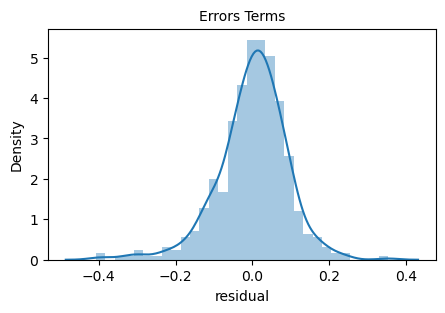

In [224]:
plt.figure(figsize=(5,3))
plt.title('Errors Terms', fontsize = 10)
plt.xlabel('residual', fontsize = 10)
sns.distplot(residual)


### Error terms are normally distributed with mean 0

## MultiCollinearity

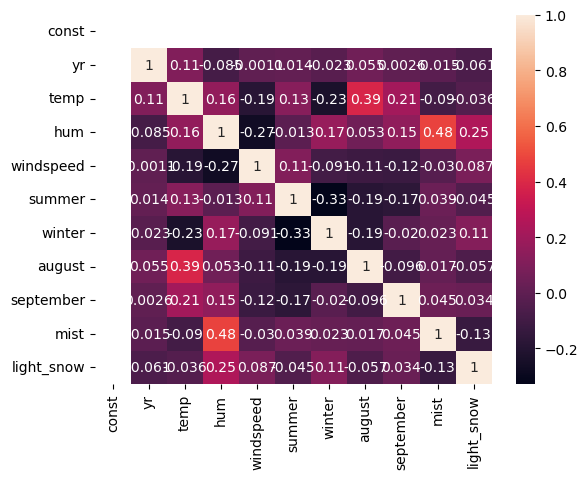

In [225]:
sns.heatmap(X_train_rfe.corr(),annot = True)
plt.show()

In [226]:
#We can see from heatmap is that multicollinearity is lower between independent variables

## homoscedasticity

In [227]:
#We can check homoscedasticity by plotting a graph of residuals and analyse variance

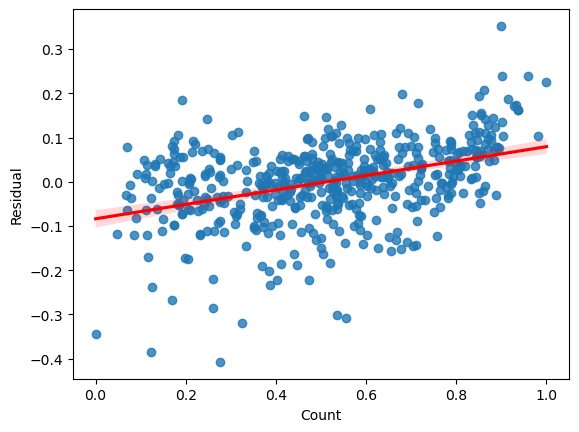

In [228]:
sns.regplot(x=y_train, y=residual, fit_reg=True, line_kws={'color':'red'})
plt.xlabel("Count")
plt.ylabel("Residual")
plt.show()

In [229]:
#There is no pattern visible for variance and the residual terms are along the best fit line

In [230]:
num_vars

['temp', 'atemp', 'windspeed', 'cnt', 'hum']

## Linear relationship between independent variables and target variable

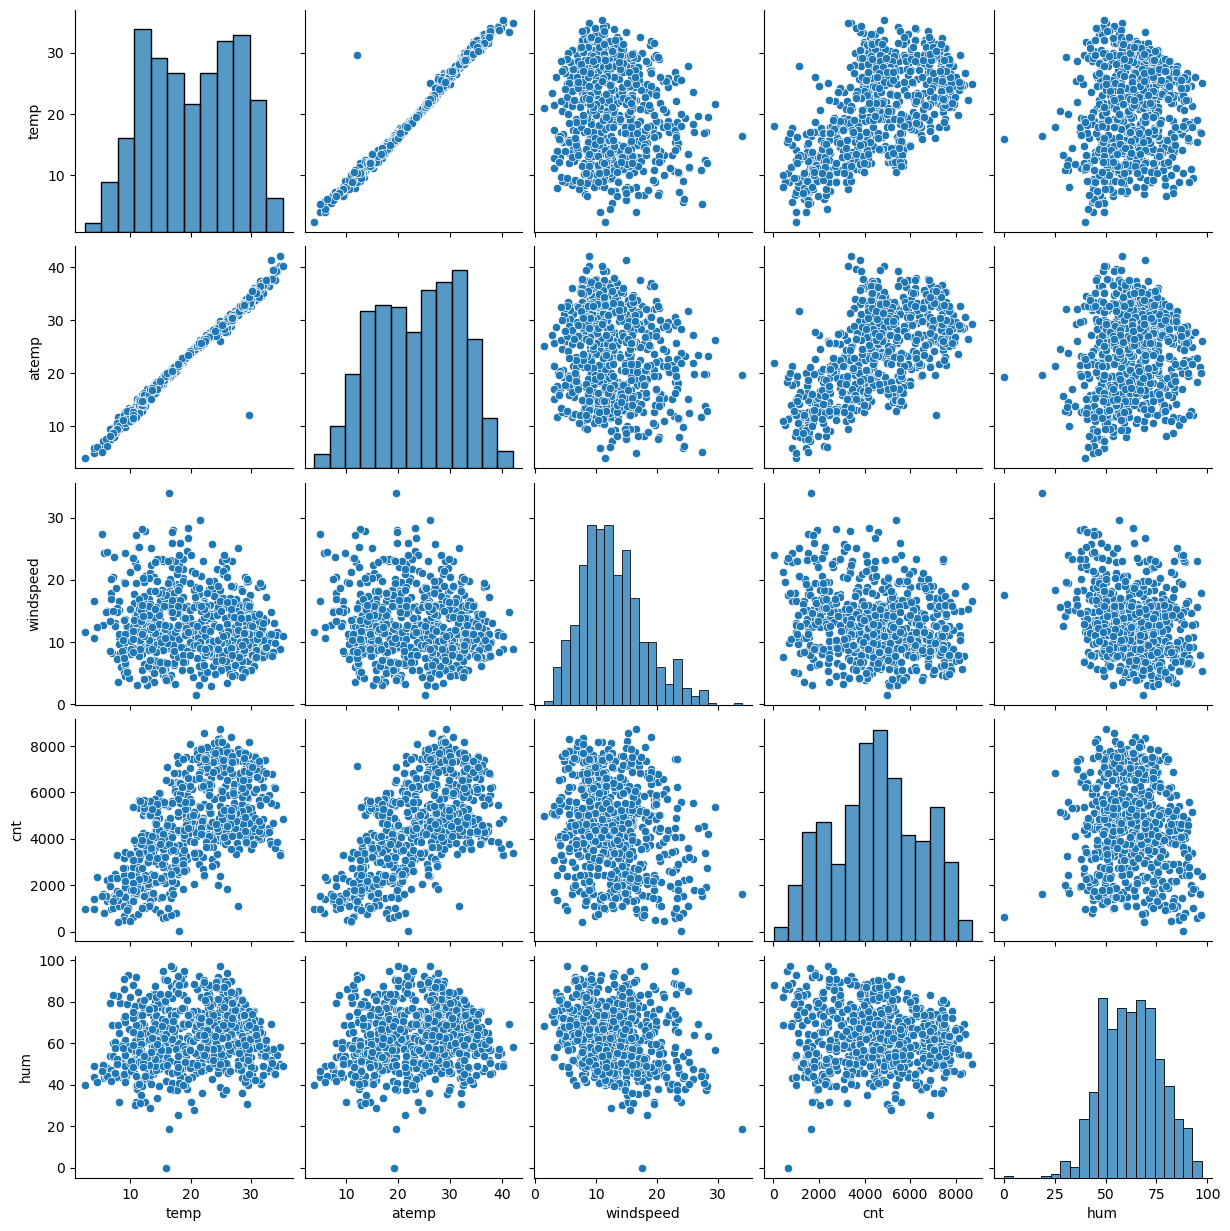

In [231]:
sns.pairplot(bike_df[num_vars])
plt.show()

In [232]:
#We can clearly see linear relationship between temp, atemp and cnt

# Step 7:

## Predictions and evaluations on the test data

In [233]:
# Scaling
num_vars

['temp', 'atemp', 'windspeed', 'cnt', 'hum']

In [234]:
bike_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,13.22605,68.7917,11.791732,2947,0,0,...,0,0,0,0,0,0,0,0,1,0
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,1,0,1,0,0,0,0,0,0
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,1,0,...,0,0,0,0,0,0,0,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,0,0,1,0,0,0,1,0


In [235]:
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [236]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that our test data is also in 0 to 1 range

In [237]:
#Creating X_test and y_test

In [238]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [239]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [240]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [241]:
# fetching rfe supported columns from X_train_rfe

In [242]:
cols = X_train_rfe.columns

In [243]:
cols

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'august',
       'september', 'mist', 'light_snow'],
      dtype='object')

In [244]:
rfe_cols = ['yr', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'august',
       'september', 'mist', 'light_snow']

In [245]:
# renaming rfe supported columns in X_test
X_test.rename(columns = {'season_2':'summer'}, inplace = True) 
X_test.rename(columns = {'season_4':'winter'}, inplace = True) 
X_test.rename(columns = {'mnth_3':'march'}, inplace = True) 
X_test.rename(columns = {'mnth_4':'april'}, inplace = True) 
X_test.rename(columns = {'mnth_5':'may'}, inplace = True) 
X_test.rename(columns = {'mnth_8':'august'}, inplace = True) 
X_test.rename(columns = {'mnth_9':'september'}, inplace = True) 
X_test.rename(columns = {'mnth_10':'october'}, inplace = True) 
X_test.rename(columns = {'weathersit_2':'mist'}, inplace = True) 
X_test.rename(columns = {'weathersit_3':'light_snow'}, inplace = True) 


In [246]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,season_3,winter,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mist,light_snow
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [247]:
#Keeping only the rfe supported columns in X_test

In [248]:
X_test = X_test[rfe_cols]

In [249]:
X_test.head()

,yr,temp,hum,windspeed,summer,winter,august,september,mist,light_snow
184,0,0.831783,0.657364,0.084219,0,0,0,0,1,0
535,1,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,0,0.511964,0.837699,0.334206,0,1,0,0,1,0
221,0,0.881625,0.437098,0.339570,0,0,1,0,0,0
152,0,0.817246,0.314298,0.537414,1,0,0,0,0,0


In [250]:
#adding constant to test data
X_test = sm.add_constant(X_test)
X_test.head()

,const,yr,temp,hum,windspeed,summer,winter,august,september,mist,light_snow
184,1.0,0,0.831783,0.657364,0.084219,0,0,0,0,1,0
535,1.0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,1.0,0,0.511964,0.837699,0.334206,0,1,0,0,1,0
221,1.0,0,0.881625,0.437098,0.339570,0,0,1,0,0,0
152,1.0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0


In [251]:
#making predictions with test data on final model
y_test_predictions = model_5.predict(X_test)

In [252]:
y_test_predictions

184    0.494932
535    0.914244
299    0.390179
221    0.623126
152    0.621001
         ...   
400    0.364906
702    0.699424
127    0.521714
640    0.801815
72     0.279339
Length: 219, dtype: float64

In [253]:
# Calculating R2 score for test model
r2 = r2_score(y_test, y_test_predictions)

In [254]:
r2

0.8025182301487384

In [255]:
# Calculating adjusted r-squared
Adj_r2 = 1 - (1-r2_score(y_test, y_test_predictions)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [256]:
Adj_r2

0.7920240298184781

### We can see that r-squared and adjusted r-squared are very close to each other for test data 

##  Train data ---------------------------------------------------------------Test data

      1. R-squared     - 0.837                                               1. R-squared     - 0.802
      2. Adj.R-squared - 0.834                                               2. Adj.R-squared - 0.792

We can also see that R-squared value is close in train and test data

In [257]:
# plotting y_test and y_test_predictions

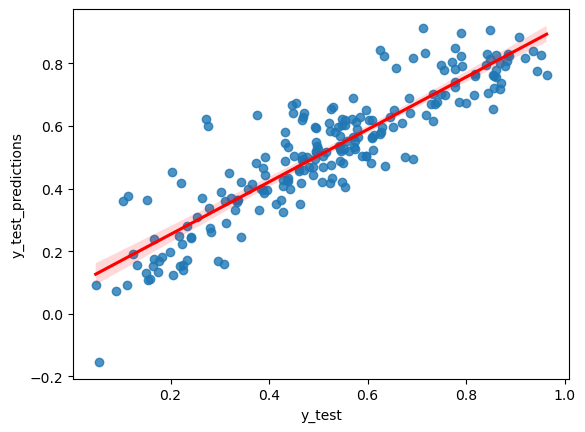

In [258]:
sns.regplot(x=y_test, y=y_test_predictions, fit_reg=True, line_kws={'color':'red'})
plt.xlabel("y_test")
plt.ylabel("y_test_predictions")
plt.show()

In [259]:
# We can see a clear linear relationship between y_test and y_test_predictions

## Best-fitted Line Equation:

In [260]:
round(model_5.params,2)

const         0.23
yr            0.23
temp          0.54
hum          -0.18
windspeed    -0.19
summer        0.10
winter        0.15
august        0.06
september     0.12
mist         -0.05
light_snow   -0.23
dtype: float64

 cnt = 0.23 + 0.23yr + 0.54temp - 0.18hum - 0.19windspeed + 0.10summer + 0.15winter + 0.06august + 0.12september -0.05mist -0.23light_snow

# Step 7:

# Inference:

     1. Expected increase in hiring bike in the next year by 0.23 times
     2. A unit increase in temp(temperature) might increase the demand by 0.54 times.
     3. A unit increase increase in windspeed might lead to decrease in bike demands by 0.19 times
     4. When the humidity increases, there is a drop in demand for bikes hiring by 0.18 times
     5. In summer, demand increases by 0.10 times
     6. In winter, demand increases by 0.15 times
     7. In august and september, demand increases by 0.06 and 0.12 times respectively
     8. When there is a light snow, demand decreases by 0.23 times

### From the above points we can understand that when in summer , good weather times the bike hires increases so if the company boom_bikes have large number of bikes available and attractive offers, this will increase their sales in a positive way

# Features which holds significance in bike hire demands

    1. year           
    2. temperature          
    3. humidity          
    4. windspeed    
    5. summer        
    6. winter        
    7. august        
    8. september    
    9. mist         
    10.light_snow   